In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#number of steps
N_x, N_y = 1000, 1000

#total range -- starts at (0, 0)
x_max, y_max = 10, 10

#size of each step
dx = x_max / N_x
dy = y_max / N_y

In [3]:
#calculate distance
def distance(v1, v2):
    sum = 0
    for i in range(3):
        sum += (v1[i] - v2[i])**2
    return sum**(1/2)

In [4]:
#get the potential given the three charges given
def get_phi(x, y, z):
    v = [x, y, z]
    
    r1 = [2, 3, 3]
    r2 = [3, 2, -1]
    r3 = [6, 8, 3]
    r = [r1, r2, r3]

    q1 = 2
    q2 = -2
    q3 = 0.5
    q = [q1, q2, q3]
    
    phi = 0
    for i in range(3):
        phi += q[i] / distance(v, r[i])
    return phi

In [5]:
#define an array and axes
phi = np.zeros((N_y + 1, N_x + 1))
X = np.zeros(N_x + 1)
Y = np.zeros(N_y + 1)

#set values for the Y axis
for y in range(0, N_y + 1):
    Y[y] = y * dy

#set values for the X axis
for x in range(0, N_x + 1):
    X[x] = x * dx
    #compute the potentials at each point in our grid
    for y in range(0, N_y + 1):
        phi[y][x] = get_phi(x * dx, y * dy, 1)

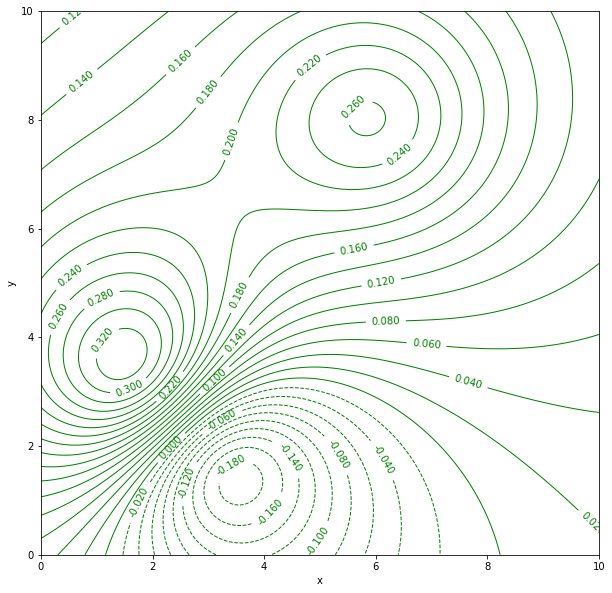

In [6]:
#how many countours you want
N_c = 100

#minimum potential
c_start = -1

#maximum potential
c_end = 1

#change in each potential step
dc = (c_end - c_start) / N_c

#create a countour set and define it from c_start to c_end
c_level = np.zeros(N_c + 1)
for c in range(0, N_c + 1):
    c_level[c] = c_start + c * dc

#plot it!
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.contour(X, Y, phi, levels=c_level, colors='g', linewidths=1).clabel()
ax.set_xlabel('x')
ax.set_ylabel('y')

#plot on next page
plt.show()